In [32]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2

import pandas as pd
import  numpy               as      np
import  h5py 
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


#import  time


In [2]:
y   =   Import_TIF(filename = 'img_000000000_Default_000.tif', path = '../2611_trento_K27M/water_up/Pos0/' )
y   =   np.mean(y, 1)

Cojone  modifica le cose in modo che la funzione apra da sola il file.mat


ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


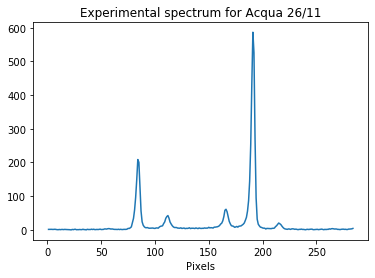

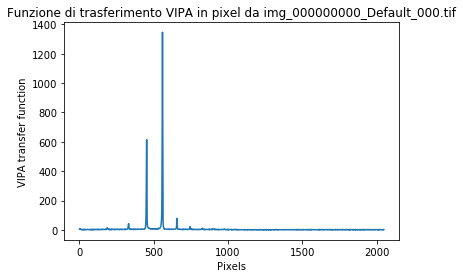

In [3]:
Water   =   Exp.Spectrum('Acqua 26/11')
Water.Get_Spectrum(y, offset = 183., fig = 'Spectrum_Pix', save_path = '../figure/')
Water.Get_VIPA_tif(tif_filename = 'img_000000000_Default_000.tif', path ='../2611_trento_K27M/elastici_verdi/Pos0/', fig = 'VIPA_Pix', save_path = '../figure/')




 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 20.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 83 	 x_value (Pix) = 84.00 	 ampiezza(Pix) = 4.15 


 Il picco 2 ha: 	 indice = 111 	 x_value (Pix) = 112.00 	 ampiezza(Pix) = 5.00 


 Il picco 3 ha: 	 indice = 165 	 x_value (Pix) = 166.00 	 ampiezza(Pix) = 4.77 


 Il picco 4 ha: 	 indice = 190 	 x_value (Pix) = 191.00 	 ampiezza(Pix) = 3.69 



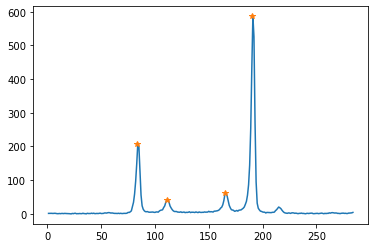

In [4]:
kwargs = {'height' : 20, 'width' : 0.001}

_,_ = Analyze_Peaks(Water.x_pix, Water.y, 'Pix', fig = True, verbose=True, **kwargs)



 Ho trovato 3 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 50.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 452 	 x_value (Pix) = 453.00 	 ampiezza(Pix) = 4.15 


 Il picco 2 ha: 	 indice = 558 	 x_value (Pix) = 559.00 	 ampiezza(Pix) = 3.57 


 Il picco 3 ha: 	 indice = 655 	 x_value (Pix) = 656.00 	 ampiezza(Pix) = 3.64 



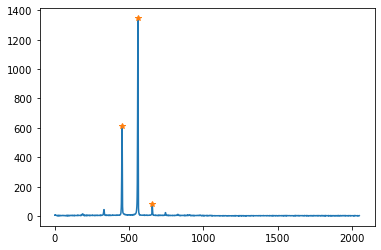

In [5]:
_,_ = Analyze_Peaks(Water.x_VIPA, Water.y_VIPA, 'Pix', verbose=True, fig = True, height = 50, width = 0.00001)

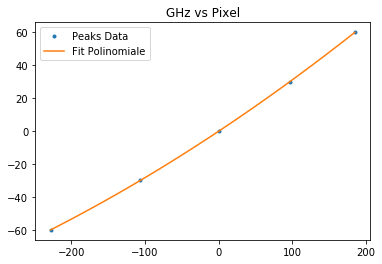

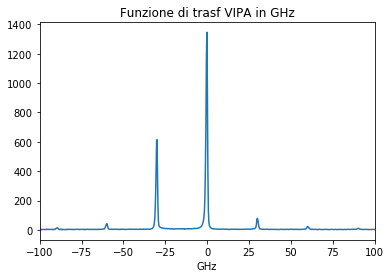

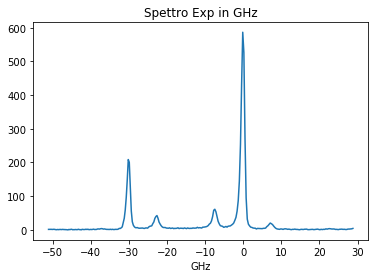

In [6]:
Water.Fit_Pixel2GHz(fig = True, height = 20)
Water.VIPA_Pix2GHz(fig=True)
Water.Spectrum_Pix2GHz(fig=True)



 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 20.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 83 	 x_value (GHz) = -30.16 	 ampiezza(GHz) = 4.15 


 Il picco 2 ha: 	 indice = 111 	 x_value (GHz) = -22.64 	 ampiezza(GHz) = 5.00 


 Il picco 3 ha: 	 indice = 165 	 x_value (GHz) = -7.46 	 ampiezza(GHz) = 4.77 


 Il picco 4 ha: 	 indice = 190 	 x_value (GHz) = -0.13 	 ampiezza(GHz) = 3.69 



Ho stimato 9 parametri iniziali per il fit che andrai a fare

Omega  = 7.590 

Gamma  = 0.488 

Delta  = 0.488 

offset  = 9.813 

Co  = 1000.000 

shift  = 0.000 

tau  = 1.000 

delta_amplitude  = 586.538 

delta_width  = 0.500 



Text(0.5, 1.0, 'Water Exp Counts vs GHz')

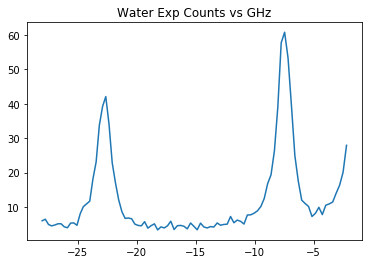

In [7]:
syg_kwargs = {'height' : 20, 'width' : 0.001}
Water.Cut_n_Estimate_Spectrum(cut = True, distanza = 0.5, verbose = True,  **syg_kwargs)

plt.figure()
plot(Water.x_freq, Water.y)
plt.title('Water Exp Counts vs GHz')



 Ho trovato 3 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 50.00 
 Spessore > 0.00 


Ho stimato i parametri della gaussiana come A = 1545.71	mu  = -8.44	sigma = 15.80
E li ho aggiunti ai parametri iniziali per il fit. Ora conosco 12 parametri su 12 



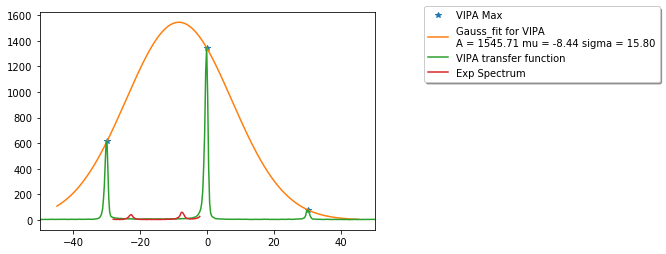

In [8]:
Water.Fit_VIPA_Gaussian(fig = True, height = 50, width = 0.0001)

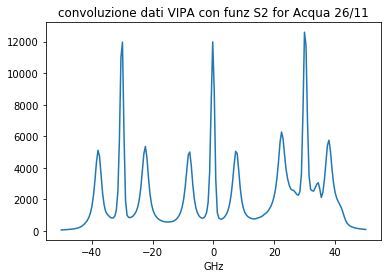

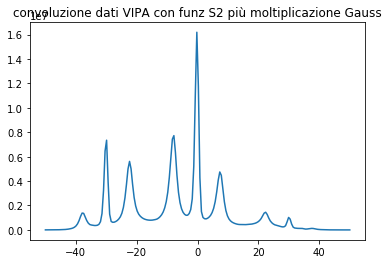

In [42]:
p0  =   pd.DataFrame(Water.p0, columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width','delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset'))
_ = Water.Gauss_Convolve_Theoretical_Response (p0.values[0], fig = True, fantoccio = (-50, 50))

In [78]:
p0  =   pd.DataFrame(Water.p0, columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width','delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset'))
p0['Co'] = [1000]
p0['Omega']= [7.2]
p0.T


,0
Co,1000.000000
Omega,7.200000
Gamma,0.488387
Delta,0.488387
tau,1.000000
delta_width,0.500000
delta_amplitude,586.538462
A,1545.713516
mu,-8.439544
sigma,15.797393


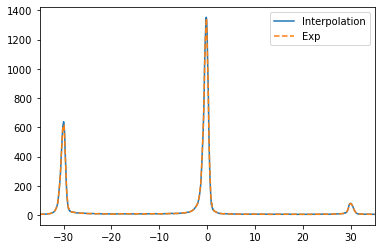

In [79]:
w_j     = np.linspace(-35, 35, Water.x_VIPA_freq.size)
kernel  = Water.Interpolate_VIPA(w_j)  
plot(w_j, kernel, label = 'Interpolation')
plot(Water.x_VIPA_freq, Water.y_VIPA, '--',label = 'Exp')
plt.xlim(-35, 35)
plt.legend()

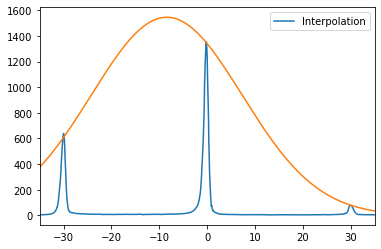

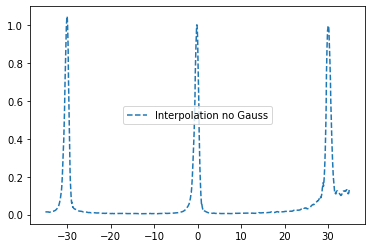

In [80]:
p =  p0.values[0]
kernel_noGAUSS  =   kernel/(p[7]*(np.exp(-((w_j-p[8])**2)/(2*(p[9]**2)))))
plot(w_j, kernel, label = 'Interpolation')
plot(w_j, gaussian(w_j, p[7], p[8], p[9]))
plt.xlim(-35, 35)
plt.legend()

plt.figure()
plot(w_j, kernel_noGAUSS, '--',label = 'Interpolation no Gauss')
plt.legend()

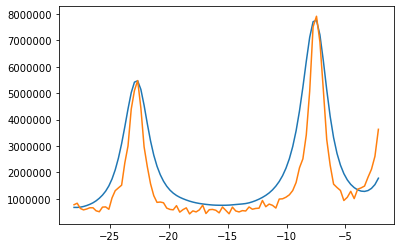

In [81]:
conv = np.zeros(Water.x_freq.size)
for  ii in range(len(Water.x_freq)):

    delta_w                 =   Water.x_freq[ii] -   w_j
    theor                   =   S_Dynamical_Form_Factor_2(delta_w-p[10], *p[0:7])
    conv[ii]                =   np.sum(theor*kernel_noGAUSS)



conv_GAUSS  =   conv*(p[7]*(np.exp(-((Water.x_freq-p[8])**2)/(2*(p[9]**2)))))
plot(Water.x_freq, conv_GAUSS)
plot(Water.x_freq, 130000*Water.y)

In [82]:
conv[0]

941.5111671875354

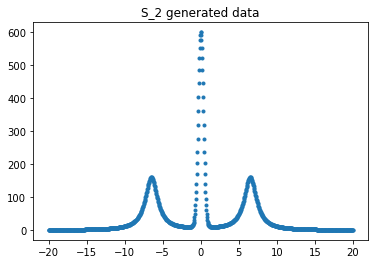

In [77]:
_, _ = S_2_Generate(*p[:7], -20, 20, 1000, fig = True)

In [84]:
Water.Non_Linear_Least_Squares(p0 = p, my_method = 'least_squares', verbose = 2, fig = True)

c:\Users\patri\Desktop\FLAUTO DI PAN\TESI\RUOCCO\BRILLOUIN\Python and Fits\Python_Libraries\lib_Experimentum.py:469: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (p0 == 'auto'):

Assumo vettore dei parametri iniziali da quello inserito come arg
 [ 1.00000000e+03  7.20000000e+00  4.88386622e-01  4.88386622e-01
  1.00000000e+00  5.00000000e-01  5.86538462e+02  1.54571352e+03
 -8.43954419e+00  1.57973929e+01  0.00000000e+00  9.81339031e+00] 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.7564e+14                                    4.20e+14    
       1              2         5.9643e+04      3.76e+14       1.93e+03       8.96e+06    
       2              6         5.3484e+04      6.16e+03       6.04e+01       5.24e+06    
       3              7         6.7622e+03      4.67e+04       1.51e+01       4.11e+05    
       4       

ValueError: 11 columns passed, passed data had 12 columns

In [87]:
Water.res_lsq

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
        cost: 59.729138428100086
         fun: array([ 2.33786394,  0.88456464,  1.88790082,  1.93197224,  1.41398349,
        0.86948729,  0.80384065,  1.70128868,  2.02036741,  0.75793835,
        0.85253206,  1.88202121, -0.79922149, -1.74243143, -0.6744413 ,
        1.50718364, -0.26263993,  1.4417661 , -0.98294882,  0.70192715,
       -0.90856362,  0.33063332,  1.14878212, -1.37481032, -1.14967387,
       -0.11455048,  0.52412792, -0.39342936, -0.77723949,  0.3036289 ,
        0.3569184 ,  0.28277167, -1.01089881,  0.83613077,  0.11211612,
       -0.41466146,  1.30350985,  0.32995238,  0.57686918, -0.06001457,
       -1.43650381,  0.96643515, -0.19933148, -0.33037691, -0.11676961,
        0.62559032, -1.06471379, -0.0783345 ,  0.93639894, -0.96660135,
        0.17186388,  0.43772123, -0.0295772 ,  0.00968408, -1.1645009 ,
       -0.41125253, -0.47174954, -0.33681945, -2.36740602, -0.34327648,
       -0.87925214,

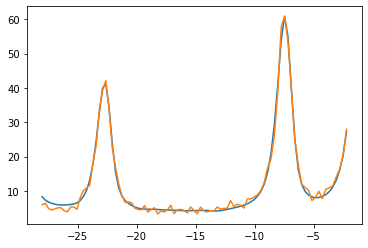

In [90]:
plot(Water.x_freq, Water.Gauss_Convolve_Theoretical_Response(Water.res_lsq.x))
plot(Water.x_freq, Water.y, '.')